---

# The Use of Single Neuron Model

## The Perceptron

Baisc idea of how neural networks work:

Single nuron model with the sign activation function is like using linear regression to classify data.
By calculating the dot product of input variables and weight, we can  get the estimated value of output, and then we can use the sign function to get the predicted value of output.

Moreover, by keep updateing the weight based on error, we will finally get a good weight to classify the data.

Below is a picture of how perceptron works.



The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p align="center">
    <img src="ThePerceptronImage.png" width="500">
</p>


For supplemental videos on this topic see:
1. [Single Neuron Model and Perceptron Theory Video](https://www.youtube.com/watch?v=SmEKxsd_67w&t=1935s)
2. [Implementing the Perceptron Code Video](https://www.youtube.com/watch?v=NpTfxpHlHJ4&t=1581s)

---

In [1]:
# %pip install mlxtend #for ploting 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/palmer_penguins.csv")
df.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [3]:
df1=df[(df['species']=='Adelie') & (df['island']=='Torgersen')]

df11 = df1.dropna()

---

The Perceptron is suitable for binary classification problems, which is why I have decided to use it for the task at hand. Specifically, I will be using sex as the variable to implement and train the perceptron on. To narrow down the scope of the problem, I will be focusing on the adelie species and torgersen island as the base conditions.

For this analysis, I will only consider two feature measurements: 'bill_depth_mm' and 'bill_length_mm'. In addition, it is necessary to convert the string values associated with each sex to numerical values. To achieve this, I will map "male" species to -1 and "female" species to 1.

Moreover, to make the variable compare at same scale, I will normalize the data by deviding the value by the maximum value of the variable.

---

In [17]:
# Store the desired species values in the numpy array y
y = df11.sex.values

# Convert each entry of y with Male to -1 and Female as 1
y = np.where(y == 'Male', -1, 1)

# Store the desired feature measurements in the matrix X

X1 = df11['bill_depth_mm'].values.reshape((-1,1))  # can use -1 as the length 

X2 = df11['body_mass_g'].values.reshape((len(X1),1))

m1 = max(X1)
m2 = max(X2)
X1 = X1/m1   
X2 = X2/m2
X = np.hstack((X1,X2))

#print(f'{X=}')
#print(f'{y=}')

---
Below is the custom python class for a single neuron model. The class has the following attributes:

1. `weights` - the weights of the neuron
2. `learning_rate` - the learning rate of the neuron

The class has the following methods:

1. `__init__` - the constructor for the class
2. `predict` - the method that predicts the output of the neuron
3. `train` - the method that trains the neuron

---

In [6]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50): 
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y): # this is a method under Perceptron class

        self.w_ = np.random.rand(1 + X.shape[1]) # add a bias term, and generate 3 random weights for x and bias
        
        self.errors_ = []
        
        for _ in range(self.epochs): #numbers of iteration
            errors = 0
            for xi, target in zip(X, y): 
                update = self.eta * (self.predict(xi) - target)  # using update rule to change the weight for x 
                self.w_[:-1] -= update*xi # after update, calculate the new value for predict 
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]  # this is the value calculated 
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # after activation function 


---

Next we can instantiate an instance of the ```Perceptron``` class and also train this instance over 200 epochs.



---

In [13]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs=2_00) 
 
# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

---

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. 

---

In [14]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y ==  y_hat)

[ True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True]


---

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the ```plot_decision_regions``` function imported at the top of this notebook. This function will scatter the  data in the plane and also show the regions of space where a given point will be classified either -1 or 1. But the x and y are in the normalized scale, it showed how the data have been classified by the perceptron.

From the error plot, we can see that the error is decreasing as the number of epochs increases. The error is 0 when the number of epochs is 200, which means the perceptron has been trained well.


---

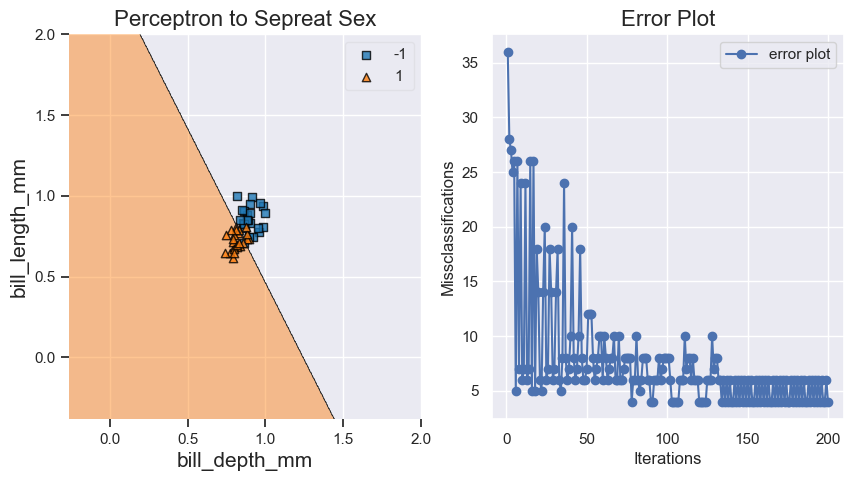

In [18]:
plt.figure(figsize = (10, 5))


plt.subplot(1,2,1)
plot_decision_regions(X, y, clf = percep)
plt.xlabel("bill_depth_mm", fontsize = 15)
plt.ylabel("bill_length_mm", fontsize = 15)
plt.title('Perceptron to Sepreat Sex',fontsize = 16)

plt.subplot(1,2,2)
#plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.title("Error Plot", fontsize = 16)
plt.legend()


---

# Conclusion 

This is the basic idea for clasiifying data by using single neuron model. The perceptron is a single neuron model with the sign activation function. By calculating the dot product of input variables and weight, we can  get the estimated value of output, and then we can use the sign function to get the predicted value of output. Moreover, by keep updateing the weight based on error, we will finally get a good weight to classify the data.


---